# Sports Betting Data Cleaning and Preprocessing

## Introduction
This notebook aims to analyze historical game statistics and betting odds data to develop predictive models for sports betting. The dataset consists of game statistics and betting odds, which we will preprocess and engineer to create meaningful features for analysis.

### Import Libraries

In [4]:
import pandas as pd 
import numpy as np 

### Extract Datasets
We begin by extract the game statistics (`Game.csv`) and betting odds (`BettingOdds_History.csv`) datasets into Pandas DataFrames.

In [5]:
game_stats_path = 'datasets/Game.csv'
betting_odds_path = 'datasets/BettingOdds_History.csv'

game_stats = pd.read_csv(game_stats_path)
betting_odds = pd.read_csv(betting_odds_path)

## Preprocessing and Cleaning

### Handling Missing Values in Game Statistics Data

We begin by handling missing values in the game statistics dataset. Rows with missing `GAME_ID` are removed. For numeric columns, missing values are filled with the column mean. Rows with more than 20% missing data are also removed.

In [6]:
# Handle missing values in game stats data
game_stats.dropna(subset=['GAME_ID'], inplace=True)

In [7]:
# Fill missing numeric data with mean or placeholder value
numeric_cols = game_stats.select_dtypes(include=[np.number]).columns
game_stats[numeric_cols] = game_stats[numeric_cols].fillna(game_stats[numeric_cols].mean())

In [8]:
game_stats.dropna(thresh=int(0.8 * len(game_stats.columns)), inplace=True)

### Handling Team Names and Abbreviations in Game Statistics Data
In this step, we will clean the dataset by standardizing the names of NBA teams that have undergone name changes or relocations over time. This ensures consistency in the data, which is essential for accurate analysis and modeling. 

Identify and inspect the columns that contain team names and abbreviations to understand how they are represented in the dataset.

In [11]:
df = game_stats
# Get unique values for team names and abbreviations
print(df['TEAM_NAME_HOME'].unique())
print(df['TEAM_ABBREVIATION_HOME'].unique())

['Toronto Huskies' 'Chicago Stags' 'St. Louis Bombers'
 'Providence Steamrollers' 'Detroit Falcons' 'Cleveland Rebels'
 'Pittsburgh Ironmen' 'Boston Celtics' 'Philadelphia Warriors'
 'New York Knicks' 'Washington Capitols' 'Baltimore Bullets'
 'Indianapolis Jets' 'Ft. Wayne Zollner Pistons' 'Rochester Royals'
 'Minneapolis Lakers' 'Tri-Cities Blackhawks' 'Indianapolis Olympians'
 'Waterloo Hawks' 'Syracuse Nationals' 'Anderson Packers'
 'Sheboygan Redskins' 'Denver Nuggets' 'Milwaukee Hawks' 'St. Louis Hawks'
 'Detroit Pistons' 'Cincinnati Royals' 'Los Angeles Lakers'
 'Chicago Packers' 'Chicago Zephyrs' 'San Francisco Warriors'
 'Philadelphia 76ers' 'Chicago Bulls' 'San Diego Rockets'
 'Seattle SuperSonics' 'Atlanta Hawks' 'Milwaukee Bucks' 'Phoenix Suns'
 'Buffalo Braves' 'Portland Trail Blazers' 'Cleveland Cavaliers'
 'Houston Rockets' 'Golden State Warriors' 'Kansas City-Omaha Kings'
 'Capital Bullets' 'Washington Bullets' 'New Orleans Jazz'
 'Kansas City Kings' 'Indiana Pacers' 'S

We will create a dictionary that maps old team names to their current or standardized versions. Specifically, we will:

1. Replace `Charlotte Bobcats` with `Charlotte Hornets` and update the abbreviation to `CHA`.
2. Replace `New Jersey Nets` with `Brooklyn Nets` and update the abbreviation to `BKN`.
3. Replace `New Orleans Hornets` with `New Orleans Pelicans` and update the abbreviation to `NOP`.
4. Replace `Seattle SuperSonics` with `Oklahoma City Thunder` and update the abbreviation to `OKC`.
5. Standardize `Los Angeles Clippers` to `LA Clippers` and update the abbreviation to `LAC`.

This cleaning process will be applied to both the away and home team columns.

In [12]:
# Dictionary for name replacements
team_name_changes = {
    'Charlotte Bobcats': 'Charlotte Hornets',
    'New Jersey Nets': 'Brooklyn Nets',
    'New Orleans Hornets': 'New Orleans Pelicans',
    'Seattle SuperSonics': 'Oklahoma City Thunder',
    'Los Angeles Clippers': 'LA Clippers'
}

# Dictionary for abbreviation updates
team_abbreviation_changes = {
    'Charlotte Hornets': 'CHA',
    'Brooklyn Nets': 'BKN',
    'New Orleans Pelicans': 'NOP',
    'Oklahoma City Thunder': 'OKC',
    'LA Clippers': 'LAC'
}

# Replace team names in away and home columns
df['TEAM_NAME_AWAY'] = df['TEAM_NAME_AWAY'].replace(team_name_changes)
df['TEAM_NAME_HOME'] = df['TEAM_NAME_HOME'].replace(team_name_changes)

# Replace abbreviations based on updated team names
df['TEAM_ABBREVIATION_AWAY'] = df['TEAM_NAME_AWAY'].map(team_abbreviation_changes).fillna(df['TEAM_ABBREVIATION_AWAY'])
df['TEAM_ABBREVIATION_HOME'] = df['TEAM_NAME_HOME'].map(team_abbreviation_changes).fillna(df['TEAM_ABBREVIATION_HOME'])

# Display the cleaned DataFrame
print(df)

        GAME_ID  SEASON_ID  TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  \
0      24600001      21946    1610612752                    NYK   
1      24600004      21946    1610612752                    NYK   
2      24600003      21946    1610610031                    PIT   
3      24600002      21946    1610612738                    BOS   
4      24600005      21946    1610610036                    WAS   
...         ...        ...           ...                    ...   
62857  22100488      22021    1610612737                    ATL   
62858  22100489      22021    1610612738                    BOS   
62859  22100490      22021    1610612744                    GSW   
62860  22100491      22021    1610612751                    BKN   
62861  22100492      22021    1610612742                    DAL   

              TEAM_NAME_AWAY GAME_DATE_AWAY MATCHUP_AWAY WL_AWAY  MIN_AWAY  \
0            New York Knicks     1946-11-01    NYK @ HUS       W         0   
1            New York Knicks     1946-1

In [14]:
# Verify if the team name and abbreviation are all updated
print(df['TEAM_NAME_HOME'].unique())
print(df['TEAM_ABBREVIATION_HOME'].unique())

['Toronto Huskies' 'Chicago Stags' 'St. Louis Bombers'
 'Providence Steamrollers' 'Detroit Falcons' 'Cleveland Rebels'
 'Pittsburgh Ironmen' 'Boston Celtics' 'Philadelphia Warriors'
 'New York Knicks' 'Washington Capitols' 'Baltimore Bullets'
 'Indianapolis Jets' 'Ft. Wayne Zollner Pistons' 'Rochester Royals'
 'Minneapolis Lakers' 'Tri-Cities Blackhawks' 'Indianapolis Olympians'
 'Waterloo Hawks' 'Syracuse Nationals' 'Anderson Packers'
 'Sheboygan Redskins' 'Denver Nuggets' 'Milwaukee Hawks' 'St. Louis Hawks'
 'Detroit Pistons' 'Cincinnati Royals' 'Los Angeles Lakers'
 'Chicago Packers' 'Chicago Zephyrs' 'San Francisco Warriors'
 'Philadelphia 76ers' 'Chicago Bulls' 'San Diego Rockets'
 'Oklahoma City Thunder' 'Atlanta Hawks' 'Milwaukee Bucks' 'Phoenix Suns'
 'Buffalo Braves' 'Portland Trail Blazers' 'Cleveland Cavaliers'
 'Houston Rockets' 'Golden State Warriors' 'Kansas City-Omaha Kings'
 'Capital Bullets' 'Washington Bullets' 'New Orleans Jazz'
 'Kansas City Kings' 'Indiana Pacers' 

### Handling Missing Values in Betting Odds Data

Similarly, we handle missing values in the betting odds dataset. Rows with missing `GAME_ID` are removed, and numeric columns are filled with their mean. Additionally, rows with missing values in key columns like `HomeSpread_AtClose` and `HomeML` are removed.

In [ ]:
# Handle missing values in betting odds data
betting_odds.dropna(subset=['GAME_ID'], inplace=True)

In [ ]:
# Fill missing numeric data with mean
betting_numeric_cols = betting_odds.select_dtypes(include=[np.number]).columns
betting_odds[betting_numeric_cols] = betting_odds[betting_numeric_cols].fillna(betting_odds[betting_numeric_cols].mean())

In [ ]:
betting_odds.dropna(subset=['HomeSpread_AtClose', 'HomeML'], inplace=True)

In [ ]:
game_stats.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME
0,24600001,21946,1610612752,NYK,New York Knicks,1946-11-01,NYK @ HUS,W,0,24.0,...,31.267284,43.765853,23.95847,8.008697,5.351333,14.776821,22.447318,66,-2,0
1,24600004,21946,1610612752,NYK,New York Knicks,1946-11-02,NYK @ CHS,L,0,16.0,...,31.267284,43.765853,23.95847,8.008697,5.351333,14.776821,20.000000,63,16,0
2,24600003,21946,1610610031,PIT,Pittsburgh Ironmen,1946-11-02,PIT @ BOM,L,0,16.0,...,31.267284,43.765853,23.95847,8.008697,5.351333,14.776821,21.000000,56,5,0
3,24600002,21946,1610612738,BOS,Boston Celtics,1946-11-02,BOS @ PRO,L,0,21.0,...,31.267284,43.765853,23.95847,8.008697,5.351333,14.776821,22.447318,59,6,0
4,24600005,21946,1610610036,WAS,Washington Capitols,1946-11-02,WAS @ DEF,W,0,18.0,...,31.267284,43.765853,23.95847,8.008697,5.351333,14.776821,22.447318,33,-17,0


In [ ]:
betting_odds.head()

,GAME_ID,Date,HomeTeam,AwayTeam,HomeSpread_AtOpen,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over
0,20700001,2007-10-30 00:00:00,SAS,POR,-12.5,-13.0,184.0,189.5,-1400,900,-5.0,95.0
1,20700003,2007-10-30 00:00:00,GSW,UTA,-3.0,-1.0,214.5,212.0,-120,100,-3.0,105.5
2,20700002,2007-10-30 00:00:00,LAL,HOU,2.5,5.0,191.0,199.0,190,-230,3.0,99.0
3,20700004,2007-10-31 00:00:00,TOR,PHI,-6.5,-6.5,190.0,191.0,-305,255,-2.0,96.5
4,20700006,2007-10-31 00:00:00,IND,WAS,-1.5,1.5,200.0,203.5,105,-125,1.0,105.0


### Merging the Datasets

We merge the cleaned game statistics and betting odds datasets on the `GAME_ID` column.

In [ ]:
# Merge the two dataframes on the common 'GAME_ID' column
merged_df = pd.merge(game_stats, betting_odds, on='GAME_ID')
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,HomeTeam,AwayTeam,HomeSpread_AtOpen,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over
0,20700003,22007,1610612762,UTA,Utah Jazz,2007-10-30,UTA @ GSW,W,240,41.0,...,GSW,UTA,-3.0,-1.0,214.5,212.0,-120,100,-3.0,105.5
1,20700001,22007,1610612757,POR,Portland Trail Blazers,2007-10-30,POR @ SAS,L,240,39.0,...,SAS,POR,-12.5,-13.0,184.0,189.5,-1400,900,-5.0,95.0
2,20700002,22007,1610612745,HOU,Houston Rockets,2007-10-30,HOU @ LAL,W,240,34.0,...,LAL,HOU,2.5,5.0,191.0,199.0,190,-230,3.0,99.0
3,20700007,22007,1610612741,CHI,Chicago Bulls,2007-10-31,CHI @ NJN,L,265,38.0,...,NJN,CHI,-2.0,-1.5,188.0,186.0,-125,105,3.0,94.0
4,20700005,22007,1610612749,MIL,Milwaukee Bucks,2007-10-31,MIL @ ORL,L,240,33.0,...,ORL,MIL,-8.0,-6.5,198.5,197.0,-295,245,-3.5,97.0


### Drop Same Value Columns

In [ ]:
# Drop the 'Date' and 'GAME_DATE_HOME' columns from merged_df
merged_df = merged_df.drop(columns=['Date', 'GAME_DATE_HOME'])

# Rename the 'GAME_DATE_AWAY' column to 'GAME_DATE'
merged_df = merged_df.rename(columns={'GAME_DATE_AWAY': 'GAME_DATE'})

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,HomeTeam,AwayTeam,HomeSpread_AtOpen,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over
0,20700003,22007,1610612762,UTA,Utah Jazz,2007-10-30,UTA @ GSW,W,240,41.0,...,GSW,UTA,-3.0,-1.0,214.5,212.0,-120,100,-3.0,105.5
1,20700001,22007,1610612757,POR,Portland Trail Blazers,2007-10-30,POR @ SAS,L,240,39.0,...,SAS,POR,-12.5,-13.0,184.0,189.5,-1400,900,-5.0,95.0
2,20700002,22007,1610612745,HOU,Houston Rockets,2007-10-30,HOU @ LAL,W,240,34.0,...,LAL,HOU,2.5,5.0,191.0,199.0,190,-230,3.0,99.0
3,20700007,22007,1610612741,CHI,Chicago Bulls,2007-10-31,CHI @ NJN,L,265,38.0,...,NJN,CHI,-2.0,-1.5,188.0,186.0,-125,105,3.0,94.0
4,20700005,22007,1610612749,MIL,Milwaukee Bucks,2007-10-31,MIL @ ORL,L,240,33.0,...,ORL,MIL,-8.0,-6.5,198.5,197.0,-295,245,-3.5,97.0


## Feature Engineering

In this section, we perform various feature engineering steps on basketball game data, including calculating win columns, efficiency metrics, win streaks, and betting odds features.

### Create Win Column

In this step, we create a new column called `Win` in the `merged_df` DataFrame. This column indicates whether the home team won the game. The value is set to `1` if the points scored by the home team (`PTS_HOME`) are greater than the points scored by the away team (`PTS_AWAY`), and `0` otherwise.


In [ ]:
# Create win column
merged_df['Win'] = (merged_df['PTS_HOME'] > merged_df['PTS_AWAY']).astype(int)
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AwayTeam,HomeSpread_AtOpen,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over,Win
0,20700003,22007,1610612762,UTA,Utah Jazz,2007-10-30,UTA @ GSW,W,240,41.0,...,UTA,-3.0,-1.0,214.5,212.0,-120,100,-3.0,105.5,0
1,20700001,22007,1610612757,POR,Portland Trail Blazers,2007-10-30,POR @ SAS,L,240,39.0,...,POR,-12.5,-13.0,184.0,189.5,-1400,900,-5.0,95.0,1
2,20700002,22007,1610612745,HOU,Houston Rockets,2007-10-30,HOU @ LAL,W,240,34.0,...,HOU,2.5,5.0,191.0,199.0,190,-230,3.0,99.0,0
3,20700007,22007,1610612741,CHI,Chicago Bulls,2007-10-31,CHI @ NJN,L,265,38.0,...,CHI,-2.0,-1.5,188.0,186.0,-125,105,3.0,94.0,1
4,20700005,22007,1610612749,MIL,Milwaukee Bucks,2007-10-31,MIL @ ORL,L,240,33.0,...,MIL,-8.0,-6.5,198.5,197.0,-295,245,-3.5,97.0,1


### Convert Date Column to Datetime Format

Ensure that the date column is in the correct datetime format for proper time series operations.

In [ ]:
merged_df['GAME_DATE'].head()

0    2007-10-30
1    2007-10-30
2    2007-10-30
3    2007-10-31
4    2007-10-31
Name: GAME_DATE, dtype: object

In [ ]:
# Ensure 'GAME_DATE' is in datetime format
merged_df['GAME_DATE'] = pd.to_datetime(merged_df['GAME_DATE'])

# Convert 'GAME_DATE' to date (removing the time part)
merged_df['GAME_DATE'] = merged_df['GAME_DATE'].dt.date

merged_df['GAME_DATE'].head()

0    2007-10-30
1    2007-10-30
2    2007-10-30
3    2007-10-31
4    2007-10-31
Name: GAME_DATE, dtype: object

### Sort DataFrame by Team and Date

Sort the DataFrame by the home team and date to prepare for calculating win streaks.

In [ ]:
# Sort dataframe by team and date 
merged_df = merged_df.sort_values(by=['HomeTeam', 'GAME_DATE'])
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AwayTeam,HomeSpread_AtOpen,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over,Win
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,DAL,6.0,5.5,192.0,191.0,210,-250,5.0,94.5,1
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,PHX,5.5,5.0,208.5,207.0,190,-230,5.0,103.5,1
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,WAS,-5.0,-5.5,195.5,192.5,-230,190,-5.0,100.0,0
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,CHA,-5.0,-5.5,187.5,188.0,-240,200,1.5,93.5,1
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,SEA,-7.5,-6.0,206.0,204.5,-275,235,-5.5,100.5,0


### Calculate Win Streaks for Home and Away Teams

Create columns to track win streaks for both home and away teams.

In [ ]:
# Create a win streak column for the home team
merged_df['HomeWinStreak'] = merged_df.groupby('HomeTeam')['Win'].transform(lambda x: x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))

# Create a win streak column for the away team
merged_df['AwayWinStreak'] = merged_df.groupby('AwayTeam')['Win'].transform(lambda x: x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,HomeSpread_AtClose,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over,Win,HomeWinStreak,AwayWinStreak
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,5.5,192.0,191.0,210,-250,5.0,94.5,1,1,1
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,5.0,208.5,207.0,190,-230,5.0,103.5,1,2,1
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,-5.5,195.5,192.5,-230,190,-5.0,100.0,0,0,0
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,-5.5,187.5,188.0,-240,200,1.5,93.5,1,1,1
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,-6.0,206.0,204.5,-275,235,-5.5,100.5,0,0,0


### Calculate Point Difference

Compute the point difference between home and away teams.

In [ ]:
# Calculate point difference
merged_df['POINT_DIFF'] = merged_df['PTS_HOME'] - merged_df['PTS_AWAY']
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,Over_AtOpen,Over_AtClose,HomeML,AwayML,2H_HomeSpread,2H_Over,Win,HomeWinStreak,AwayWinStreak,POINT_DIFF
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,192.0,191.0,210,-250,5.0,94.5,1,1,1,7
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,208.5,207.0,190,-230,5.0,103.5,1,2,1,9
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,195.5,192.5,-230,190,-5.0,100.0,0,0,0,-11
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,187.5,188.0,-240,200,1.5,93.5,1,1,1,8
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,206.0,204.5,-275,235,-5.5,100.5,0,0,0,-3


### Calculate Efficiency Metrics

Compute field goal, three-point, and free throw efficiency for both home and away teams.

In [ ]:
# Field goal efficiency
merged_df['FG_EFF_HOME'] = merged_df['FGM_HOME'] / merged_df['FGA_HOME']
merged_df['FG_EFF_AWAY'] = merged_df['FGM_AWAY'] / merged_df['FGA_AWAY']

# Three-point efficiency
merged_df['FG3_EFF_HOME'] = merged_df['FG3M_HOME'] / merged_df['FG3A_HOME']
merged_df['FG3_EFF_AWAY'] = merged_df['FG3M_AWAY'] / merged_df['FG3A_AWAY']

# Free throw efficiency
merged_df['FT_EFF_HOME'] = merged_df['FTM_HOME'] / merged_df['FTA_HOME']
merged_df['FT_EFF_AWAY'] = merged_df['FTM_AWAY'] / merged_df['FTA_AWAY']

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,Win,HomeWinStreak,AwayWinStreak,POINT_DIFF,FG_EFF_HOME,FG_EFF_AWAY,FG3_EFF_HOME,FG3_EFF_AWAY,FT_EFF_HOME,FT_EFF_AWAY
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1,1,1,7,0.455696,0.437500,0.266667,0.166667,0.806452,0.800000
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1,2,1,9,0.455556,0.406977,0.250000,0.407407,0.826087,0.882353
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,0,0,0,-11,0.389610,0.431818,0.150000,0.294118,0.771429,0.800000
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1,1,1,8,0.597403,0.493976,0.500000,0.500000,0.814815,0.703704
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,0,0,0,-3,0.454545,0.474747,0.260870,0.375000,0.818182,0.838710


### Calculate Total Rebounds

Sum offensive and defensive rebounds to get total rebounds for both home and away teams.

In [ ]:
# Total rebounds
merged_df['REB_TOTAL_HOME'] = merged_df['OREB_HOME'] + merged_df['DREB_HOME']
merged_df['REB_TOTAL_AWAY'] = merged_df['OREB_AWAY'] + merged_df['DREB_AWAY']

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AwayWinStreak,POINT_DIFF,FG_EFF_HOME,FG_EFF_AWAY,FG3_EFF_HOME,FG3_EFF_AWAY,FT_EFF_HOME,FT_EFF_AWAY,REB_TOTAL_HOME,REB_TOTAL_AWAY
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1,7,0.455696,0.437500,0.266667,0.166667,0.806452,0.800000,52.0,38.0
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1,9,0.455556,0.406977,0.250000,0.407407,0.826087,0.882353,56.0,40.0
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,0,-11,0.389610,0.431818,0.150000,0.294118,0.771429,0.800000,41.0,53.0
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1,8,0.597403,0.493976,0.500000,0.500000,0.814815,0.703704,38.0,29.0
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,0,-3,0.454545,0.474747,0.260870,0.375000,0.818182,0.838710,47.0,43.0


### Calculate Rolling Averages

Compute rolling averages for points and rebounds over the last 5 games for both home and away teams.

In [ ]:
# Calculate rolling averages for home team stats (PTS, REB, etc.)
rolling_window = 5 

merged_df['Home_PTS_RollAvg'] = merged_df.groupby('HomeTeam')['PTS_HOME'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())
merged_df['Home_REB_RollAvg'] = merged_df.groupby('HomeTeam')['REB_TOTAL_HOME'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())

In [ ]:
# Calculate rolling averages for away team stats (PTS, REB, etc.)

merged_df['Away_PTS_RollAvg'] = merged_df.groupby('AwayTeam')['PTS_AWAY'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())
merged_df['Away_REB_RollAvg'] = merged_df.groupby('AwayTeam')['REB_TOTAL_AWAY'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())

In [ ]:
# List of all relevant columns
columns_of_interest = [
    'HomeTeam', 'PTS_HOME', 'REB_TOTAL_HOME',
    'AwayTeam', 'PTS_AWAY', 'REB_TOTAL_AWAY',
    'Home_PTS_RollAvg', 'Home_REB_RollAvg',
    'Away_PTS_RollAvg', 'Away_REB_RollAvg'
]

# Create a new DataFrame with these columns
subset_df = merged_df[columns_of_interest]

# Display the subset DataFrame
subset_df.head(10)

,HomeTeam,PTS_HOME,REB_TOTAL_HOME,AwayTeam,PTS_AWAY,REB_TOTAL_AWAY,Home_PTS_RollAvg,Home_REB_RollAvg,Away_PTS_RollAvg,Away_REB_RollAvg
23,ATL,101,52.0,DAL,94,38.0,101.000000,52.000000,94.0,38.0
59,ATL,105,56.0,PHX,96,40.0,103.000000,54.000000,96.0,40.0
89,ATL,90,41.0,WAS,101,53.0,98.666667,49.666667,101.0,53.0
110,ATL,117,38.0,CHA,109,29.0,103.250000,46.750000,109.0,29.0
125,ATL,123,47.0,SEA,126,43.0,107.200000,46.800000,126.0,43.0
152,ATL,83,39.0,SAS,95,39.0,103.600000,44.200000,95.0,39.0
215,ATL,96,38.0,MIL,80,34.0,101.800000,40.600000,80.0,34.0
228,ATL,86,41.0,NOH,92,49.0,101.000000,40.600000,92.0,49.0
258,ATL,95,33.0,DET,106,39.0,96.600000,39.600000,106.0,39.0
273,ATL,90,40.0,MIN,89,53.0,90.000000,38.200000,89.0,53.0


### Calculate Effective Field Goal Percentage

Calculate the effective field goal percentage for both home (`EFG_HOME`) and away (`EFG_AWAY`) teams.

In [ ]:
# Effective field goal percentage
merged_df['EFG_HOME'] = (merged_df['FGM_HOME'] + 0.5 * merged_df['FG3M_HOME']) / merged_df['FGA_HOME']
merged_df['EFG_AWAY'] = (merged_df['FGM_AWAY'] + 0.5 * merged_df['FG3M_AWAY']) / merged_df['FGA_AWAY']

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,FT_EFF_HOME,FT_EFF_AWAY,REB_TOTAL_HOME,REB_TOTAL_AWAY,Home_PTS_RollAvg,Home_REB_RollAvg,Away_PTS_RollAvg,Away_REB_RollAvg,EFG_HOME,EFG_AWAY
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,0.806452,0.800000,52.0,38.0,101.000000,52.000000,94.0,38.0,0.481013,0.462500
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,0.826087,0.882353,56.0,40.0,103.000000,54.000000,96.0,40.0,0.477778,0.470930
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,0.771429,0.800000,41.0,53.0,98.666667,49.666667,101.0,53.0,0.409091,0.460227
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,0.814815,0.703704,38.0,29.0,103.250000,46.750000,109.0,29.0,0.616883,0.542169
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,0.818182,0.838710,47.0,43.0,107.200000,46.800000,126.0,43.0,0.484848,0.505051


### Calculate Assist to Turnover Ratio

Compute the assist to turnover ratio for both home and away teams.

In [ ]:
# Assist to turnover ratio
merged_df['AST_TOV_RATIO_HOME'] = merged_df['AST_HOME'] / (merged_df['TOV_HOME'] + 1e-6)
merged_df['AST_TOV_RATIO_AWAY'] = merged_df['AST_AWAY'] / (merged_df['TOV_AWAY'] + 1e-6)

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,REB_TOTAL_HOME,REB_TOTAL_AWAY,Home_PTS_RollAvg,Home_REB_RollAvg,Away_PTS_RollAvg,Away_REB_RollAvg,EFG_HOME,EFG_AWAY,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,52.0,38.0,101.000000,52.000000,94.0,38.0,0.481013,0.462500,1.333333,1.400000
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,56.0,40.0,103.000000,54.000000,96.0,40.0,0.477778,0.470930,1.375000,1.400000
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,41.0,53.0,98.666667,49.666667,101.0,53.0,0.409091,0.460227,1.909091,2.166666
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,38.0,29.0,103.250000,46.750000,109.0,29.0,0.616883,0.542169,1.705882,1.357143
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,47.0,43.0,107.200000,46.800000,126.0,43.0,0.484848,0.505051,1.600000,1.769231


### Calculate Home/Away Performance Ratios

Determine the ratio of home team performance to away team performance in terms of field goals made and attempted.

In [ ]:
# Home/away performance ratios
merged_df['HOME_AWAY_FGM_RATIO'] = merged_df['FGM_HOME'] / merged_df['FGM_AWAY']
merged_df['HOME_AWAY_FGA_RATIO'] = merged_df['FGA_HOME'] / merged_df['FGA_AWAY']

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,Home_PTS_RollAvg,Home_REB_RollAvg,Away_PTS_RollAvg,Away_REB_RollAvg,EFG_HOME,EFG_AWAY,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,101.000000,52.000000,94.0,38.0,0.481013,0.462500,1.333333,1.400000,1.028571,0.987500
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,103.000000,54.000000,96.0,40.0,0.477778,0.470930,1.375000,1.400000,1.171429,1.046512
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,98.666667,49.666667,101.0,53.0,0.409091,0.460227,1.909091,2.166666,0.789474,0.875000
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,103.250000,46.750000,109.0,29.0,0.616883,0.542169,1.705882,1.357143,1.121951,0.927711
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,107.200000,46.800000,126.0,43.0,0.484848,0.505051,1.600000,1.769231,0.957447,1.000000


### Calculate Betting Odds Features

Create features based on betting odds, such as spread differences and probability derived from moneyline odds.

In [ ]:
# Corrected line to calculate SPREAD_DIFF
merged_df['SPREAD_DIFF'] = merged_df['HomeSpread_AtClose'] - merged_df['HomeSpread_AtOpen']
merged_df['OVER_DIFF'] = merged_df['Over_AtClose'] - merged_df['Over_AtOpen']

# Convert moneyline to probability
merged_df['HomeML'] = pd.to_numeric(merged_df['HomeML'], errors='coerce')
merged_df['AwayML'] = pd.to_numeric(merged_df['AwayML'], errors='coerce')

merged_df['HomeML_Prob'] = 1 / (1 + 10 ** ((merged_df['HomeML'] - 100) / 400))
merged_df['AwayML_Prob'] = 1 / (1 + 10 ** ((merged_df['AwayML'] - 100) / 400))
merged_df.dropna(subset=['HomeML', 'AwayML'], inplace=True)

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,EFG_HOME,EFG_AWAY,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,0.481013,0.462500,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,0.477778,0.470930,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,0.409091,0.460227,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,0.616883,0.542169,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,0.484848,0.505051,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940


### Calculate Half-Time Metrics

Create new features based on differences between second-half and full-game spreads and totals.

In [ ]:
# Half-time metrics
merged_df['2H_Spread_Diff'] = merged_df['2H_HomeSpread'] - merged_df['HomeSpread_AtClose']
merged_df['2H_Over_Diff'] = merged_df['2H_Over'] - merged_df['Over_AtClose']

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0


### Clean Up the DataFrame

Remove any rows with NaN values after performing feature engineering to ensure clean data.

In [ ]:
# Drop any rows with NaN values after feature engineering
merged_df.dropna(inplace=True)

In [ ]:
merged_df.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
23,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
59,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
89,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
110,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
125,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0


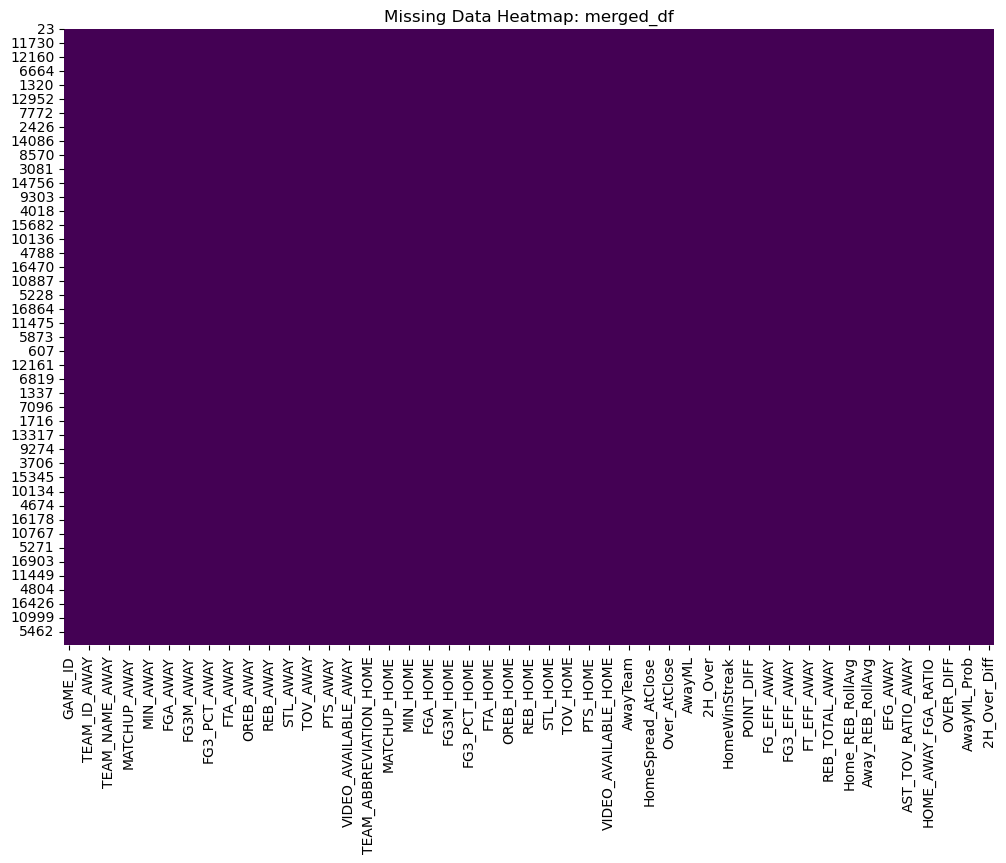

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data for merged_df
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap: merged_df')
plt.show()

In [ ]:
# Count the number of columns in merged_df
num_columns = len(merged_df.columns)
print(f'Number of columns: {num_columns}')

Number of columns: 93


## Load DataFrame to MySQL Database

In [ ]:
from sqlalchemy import create_engine

# Replace the placeholders with your MySQL credentials
user = 'root'
password = 'mYsT4nd4rdQu3rYL4ngu4g3'
host = 'localhost'  # or your MySQL server's IP address
database = 'nba_database'

# Create a connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create an engine
engine = create_engine(connection_string)

ModuleNotFoundError: No module named 'pymysql'

In [ ]:
# Define the table name where you want to store the data
table_name = 'betting_and_game_table'

# Load the DataFrame into MySQL
merged_df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

17113

In [ ]:
# Verify the data upload by reading from the table

# Read the first few rows from the table
df_from_db = pd.read_sql(f'SELECT * FROM {table_name}', con=engine)
df_from_db.head()

,GAME_ID,SEASON_ID,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,GAME_DATE,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,...,AST_TOV_RATIO_HOME,AST_TOV_RATIO_AWAY,HOME_AWAY_FGM_RATIO,HOME_AWAY_FGA_RATIO,SPREAD_DIFF,OVER_DIFF,HomeML_Prob,AwayML_Prob,2H_Spread_Diff,2H_Over_Diff
0,20700019,22007,1610612742,DAL,Dallas Mavericks,2007-11-02,DAL @ ATL,L,240,35.0,...,1.333333,1.400000,1.028571,0.987500,-0.5,-1.0,0.346783,0.882338,-0.5,-96.5
1,20700056,22007,1610612756,PHX,Phoenix Suns,2007-11-07,PHX @ ATL,L,240,35.0,...,1.375000,1.400000,1.171429,1.046512,-0.5,-1.5,0.373301,0.869850,0.0,-103.5
2,20700086,22007,1610612764,WAS,Washington Wizards,2007-11-11,WAS @ ATL,W,240,38.0,...,1.909091,2.166666,0.789474,0.875000,-0.5,-3.0,0.869850,0.373301,0.5,-92.5
3,20700106,22007,1610612766,CHA,Charlotte Bobcats,2007-11-14,CHA @ ATL,L,240,41.0,...,1.705882,1.357143,1.121951,0.927711,-0.5,0.5,0.876229,0.359935,7.0,-94.5
4,20700123,22007,1610612760,SEA,Seattle SuperSonics,2007-11-16,SEA @ ATL,W,290,47.0,...,1.600000,1.769231,0.957447,1.000000,1.5,-1.5,0.896477,0.314940,0.5,-104.0
